In [2]:
import qutip
import matplotlib.pyplot as plt 
import numpy as np
import scipy.optimize as opt 
import scipy.linalg as linalg
import pickle
import time as time
import math, cmath
import sys
import auxiliary_library as me

from IPython.display import display, Math, Latex

In [22]:
N = 5

spin_ops_list = me.one_body_spin_ops(N)
seed_op1 = Mz = sum(spin_ops_list[3][i] for i in range(N))
seed_op2 = Sx0Sx1 = spin_ops_list[1][0]*spin_ops_list[1][0+1] + spin_ops_list[1][1]*spin_ops_list[1][0] 

K = .4*seed_op2
rho0 = K.expm()
rho0 = rho0/rho0.tr()

chain_type = "XYZ"
Hamiltonian_paras = [.15, .15, .2, 1.]
H_H = me.Heisenberg_Hamiltonian(spin_ops_list, "XYZ", N, False, Hamiltonian_paras)

mk_basis = me.recursive_basis(N, 4, H_H, seed_op2)
mk_basis = me.base_orth(mk_basis, rho0)

hij_tensor = me.H_ij_matrix(H_H, mk_basis, rho0)

In [15]:
from scipy.integrate import odeint

def F(y, t, HH):
    return HH.dot(y)

In [27]:
zero_list = [0 for i in range(len(mk_basis))]
Phi0_vec = [.4] + zero_list

ts=np.linspace(0,100,100)
result = odeint(func=F, y0=Phi0_vec,t=ts,args=(hij_tensor,))
plt.figure(figsize=(10, 8))

#for i in range(len(markov_basis)):
#    plt.plot(result[i], label=r'$\phi_{(%d)}(t)$'%i)

plt.plot(result)

plt.xlabel("t")
plt.ylabel("Phi(t)")
plt.legend()

ValueError: shapes (4,4) and (5,) not aligned: 4 (dim 1) != 5 (dim 0)

In [15]:
basis = recursive_basis(5, H_H, Sx0Sx1)
basis[0] == Sx0Sx1
basis[1] == me.commutator(H_H, Sx0Sx1)
basis[2] == me.commutator(H_H, me.commutator(H_H, Sx0Sx1))
basis[3] == me.commutator(H_H, me.commutator(H_H, me.commutator(H_H, Sx0Sx1)))
basis[4] == me.commutator(H_H, me.commutator(H_H, me.commutator(H_H, me.commutator(H_H, Sx0Sx1))))

[[2, 2, 2], [2, 2, 2]]

In [124]:
basis = mk_basis
basis[0] == Sx0Sx1
basis[1] == me.commutator(H_H, Sx0Sx1)
basis[2] == me.commutator(H_H, me.commutator(H_H, Sx0Sx1))
basis[3] == me.commutator(H_H, me.commutator(H_H, me.commutator(H_H, Sx0Sx1)))
basis[4] == me.commutator(H_H, me.commutator(H_H, me.commutator(H_H, me.commutator(H_H, Sx0Sx1))))

True

In [2]:
N = 3

spin_ops_list = me.one_body_spin_ops(N)

Mz = sum(spin_ops_list[3][i] for i in range(N))
Sx0Sx1 = spin_ops_list[1][0]*spin_ops_list[1][0+1] + spin_ops_list[1][1]*spin_ops_list[1][0] 

K = .5*Mz + .5*Sx0Sx1
rho0 = K.expm()

chain_type = "XYZ"
Hamiltonian_paras = [.15, .15, .2, 1.]

#H_H, markov_basis = me.Hamiltonian_and_basis_obs(N, spin_ops_list, chain_type, Hamiltonian_paras, True)

H_H = me.Heisenberg_Hamiltonian(spin_ops_list, "XYZ", N, False, Hamiltonian_paras)

markov_basis = [Mz, Sx0Sx1]
markov_basis = me.base_orth(markov_basis, rho0)

t0_weights, rho0 = me.initial_conditions(markov_basis)
hij_tensor = me.H_ij_matrix(H_H, markov_basis, rho0)
hij_tensor

In [3]:
hij_tensor

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.04083409e-17, -3.25260652e-19]])

In [50]:
N = 4
chain_type = "XXZ"

#sx_list = me.one_body_spin_ops(N)[1]
#sz_list = me.one_body_spin_ops(N)[3]

big_list = me.one_body_spin_ops(N)
Hamiltonian_paras = [.15, .15, .2, 1.]

H_H, markov_basis = me.Hamiltonian_and_basis_obs(N, big_list, chain_type, Hamiltonian_paras, True)
t0_weights, rho0 = me.initial_conditions(markov_basis)
hij_tensor = me.H_ij_matrix(H_H, markov_basis, rho0)

#y0 = np.array([np.random.rand() for i in hij_tensor])
ts=np.linspace(0,100,100)

In [51]:
from scipy.integrate import odeint

def F(y, t, HH):
    return HH.dot(y)

result = odeint(func=F, y0=t0_weights,t=ts,args=(hij_tensor,))

In [62]:
result[:,0]

array([0.35624577, 0.35624577, 0.35624577, 0.35624577, 0.35624577,
       0.35624577, 0.35624577, 0.35624577, 0.35624577, 0.35624577,
       0.35624577, 0.35624577, 0.35624577, 0.35624577, 0.35624577,
       0.35624577, 0.35624577, 0.35624577, 0.35624577, 0.35624577,
       0.35624577, 0.35624577, 0.35624577, 0.35624577, 0.35624577,
       0.35624577, 0.35624577, 0.35624577, 0.35624577, 0.35624577,
       0.35624577, 0.35624577, 0.35624577, 0.35624577, 0.35624577,
       0.35624577, 0.35624577, 0.35624577, 0.35624577, 0.35624577,
       0.35624577, 0.35624577, 0.35624577, 0.35624577, 0.35624577,
       0.35624577, 0.35624577, 0.35624577, 0.35624577, 0.35624577,
       0.35624577, 0.35624577, 0.35624577, 0.35624577, 0.35624577,
       0.35624577, 0.35624577, 0.35624577, 0.35624577, 0.35624577,
       0.35624577, 0.35624577, 0.35624577, 0.35624577, 0.35624577,
       0.35624577, 0.35624577, 0.35624577, 0.35624577, 0.35624577,
       0.35624577, 0.35624577, 0.35624577, 0.35624577, 0.35624

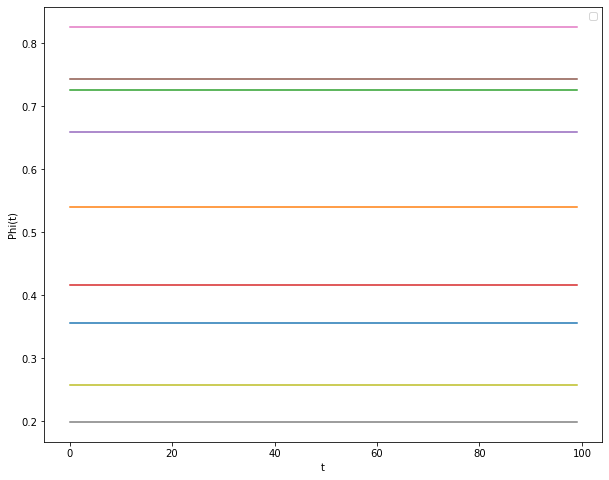

In [59]:
from scipy.integrate import odeint

def F(y, t, HH):
    return HH.dot(y)

result = odeint(func=F, y0=t0_weights,t=ts,args=(hij_tensor,))
plt.figure(figsize=(10, 8))

#for i in range(len(markov_basis)):
#    plt.plot(result[i], label=r'$\phi_{(%d)}(t)$'%i)

plt.plot(result)

plt.xlabel("t")
plt.ylabel("Phi(t)")
plt.legend()

array([ True, False,  True,  True,  True, False, False, False, False])

In [42]:
def rhot_ev(coeff_t_ev, basis):
    
    rhot = []

    for t in range(len(result[1])):
        rho_at_time_t = 0
        rho_at_time_t += sum(result[n][1] * markov_basis[n] for n in range(len(result)))
        rhot.append(rho_at_time_t)
    
    return rhot
        

In [33]:
rhot_ev(result, markov_basis)

IndexError: list index out of range

In [ ]:
<O>(t)

d/dt <O> = <[H,O]>
d/dt <[H,O]> = <[H, [H,O]]>
d/dt <[H,[H,O]]> = <[H, [H,[H,O]]>


In [72]:
spin_big_list = me.one_body_spin_ops(2)
spin_big_list[0]

[Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
 Qobj data =
 [[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
 Qobj data =
 [[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]]

In [2]:
me.classical_spin_ops

AttributeError: module 'auxiliary_library' has no attribute 'classical_spin_ops'

Two-body Gaussian initial state chosen
two-body operator chosen
Closed evolution chosen
sampling: 300
--- 22.87425947189331 seconds ---
Two-body Gaussian initial state chosen
two-body operator chosen
Closed evolution chosen
sampling: 300
--- 43.025468587875366 seconds ---


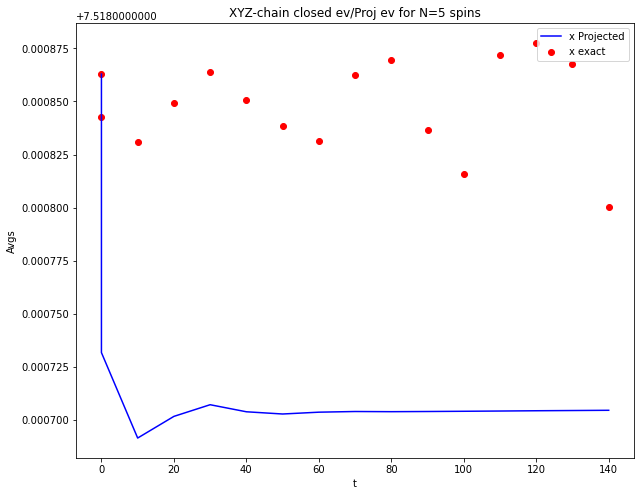

In [4]:
start_time = time.time()
H_paras = [.15, .25, .1, 1.]
size = 5

resultsA, title = me.spin_chain_ev(size = size, chain_type = "XYZ", Hamiltonian_paras = H_paras, 
                                omega_1=3., omega_2=3., temp=1, tmax = 150, deltat = 10,  
                                two_body_basis = True, unitary_ev = True, gamma = 3*np.pi*-1,
                                gaussian = True, gr = 2, xng = .7, do_project = True)

print("--- %s seconds ---" % (time.time() - start_time))

resultsB, title = me.spin_chain_ev(size = size, chain_type = "XYZ", Hamiltonian_paras = H_paras, 
                                omega_1=3., omega_2=3., temp=1, tmax = 150, deltat = 10,  
                                two_body_basis = True, unitary_ev = True, gamma = 3*np.pi*-1,
                                gaussian = True, gr = 2, xng = .7, do_project = False)

print("--- %s seconds ---" % (time.time() - start_time))

plt.figure(figsize=(10, 8))
plt.plot(resultsA["ts"], resultsA["averages"][:,0], label="x Projected", color = "blue")
plt.scatter(resultsB["ts"], resultsB["averages"][:,0], label="x exact", color = "red")

plt.xlabel("t")
plt.ylabel("Avgs")

plt.title(title)
plt.legend()

# https://stackoverflow.com/questions/52317000/how-to-reshape-a-2d-numpy-array-or-qobj-into-dims-2-2-2-2


In [ ]:
s2 = q.Qobj(q.maximally_mixed_dm(4).data.toarray().reshape((4,4)),
            dims=[[2,2],[2,2]])

In [28]:
loc_globalid = qutip.tensor([qutip.qeye(2) for k in range(5)])
loc_globalid

Quantum object: dims = [[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape = (32, 32), type = oper, isherm = True
Qobj data =
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

In [29]:
rho1 = resultsA["State ev"][1]
rho1.reshape(32,32)

ValueError: cannot reshape array of size 32 into shape (32,32)

In [15]:
rho0 = rho0.Qobj(rho0.data.toarray().reshape((4,4)), dims = [[2,2,2,2,2],[2,2,2,2,2]])

AttributeError: 'numpy.ndarray' object has no attribute 'Qobj'

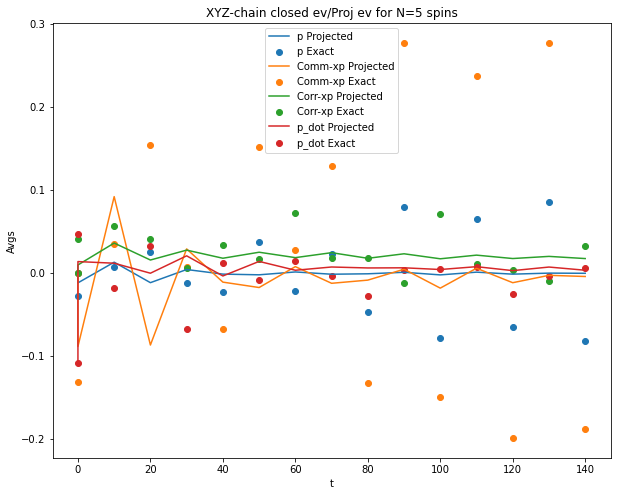

In [6]:
plot_labels = ["p ", "Comm-xp ", "Corr-xp ", "p_dot "]

plt.figure(figsize=(10, 8))
for n in range(4):
    plt.plot(resultsA["ts"], resultsA["averages"][:,n+1], label=plot_labels[n] + "Projected")
    plt.scatter(resultsB["ts"], resultsB["averages"][:,n+1], label=plot_labels[n] + "Exact")
    
plt.xlabel("t")
plt.ylabel("Avgs")
plt.title(title)
plt.legend()